In [9]:
import pandas as pd
from prophet import Prophet


In [13]:
df = pd.read_csv('avocado.csv', index_col= 0)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
df = df[df['region'] == 'Albany']

In [15]:
ana_df = df[['Date', 'AveragePrice']]
ana_df.columns = ['ds', 'y']
ana_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
7,2018-02-04,1.52
8,2018-01-28,1.32
9,2018-01-21,1.54
10,2018-01-14,1.47


In [16]:
m = Prophet(weekly_seasonality=True)
m.fit(ana_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.293557,0.929271,1.669575
530,2019-03-22,1.295898,0.937844,1.660759
531,2019-03-23,1.298395,0.917313,1.653102
532,2019-03-24,1.558310,1.184698,1.898256
533,2019-03-25,1.303827,0.923381,1.682715


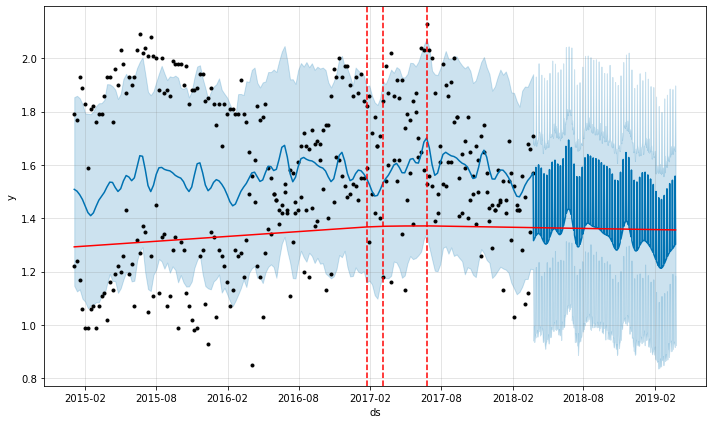

In [19]:
# Python
from prophet.plot import add_changepoints_to_plot
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

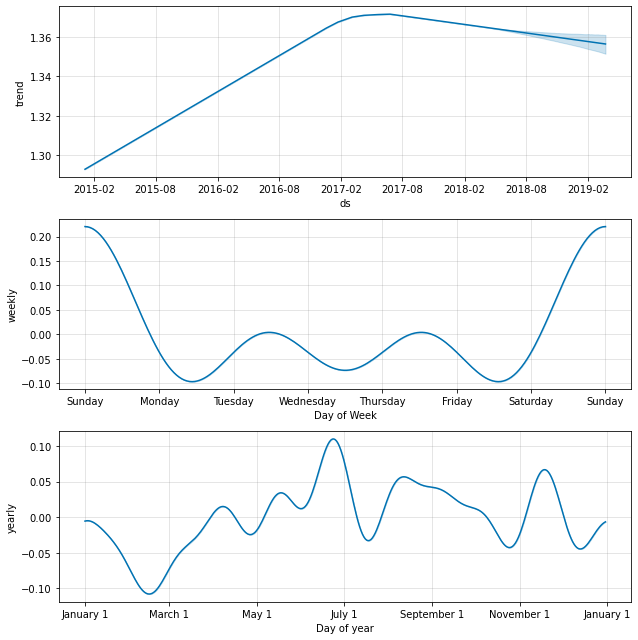

In [20]:
fig2 = m.plot_components(forecast)